`muscle –in seqs.fa –out seqs.aligned.fa`

This command runs a multiple sequence alignment algorithm via `muscle` on the `seqs.fa` file. It outputs `seqs.aligned.fa`, which is a file of aligned sequences obtained by inserting dashes in sequences.

`fasttree –nt < seqs.aligned.fa > tree.nwk`

This command generates a Newick-formatted tree via `fasttree` on the `seqs.aligned.fa` file that we created.

The code snippet below plots the Newick-formatted tree based on the `tree.nwk` file.

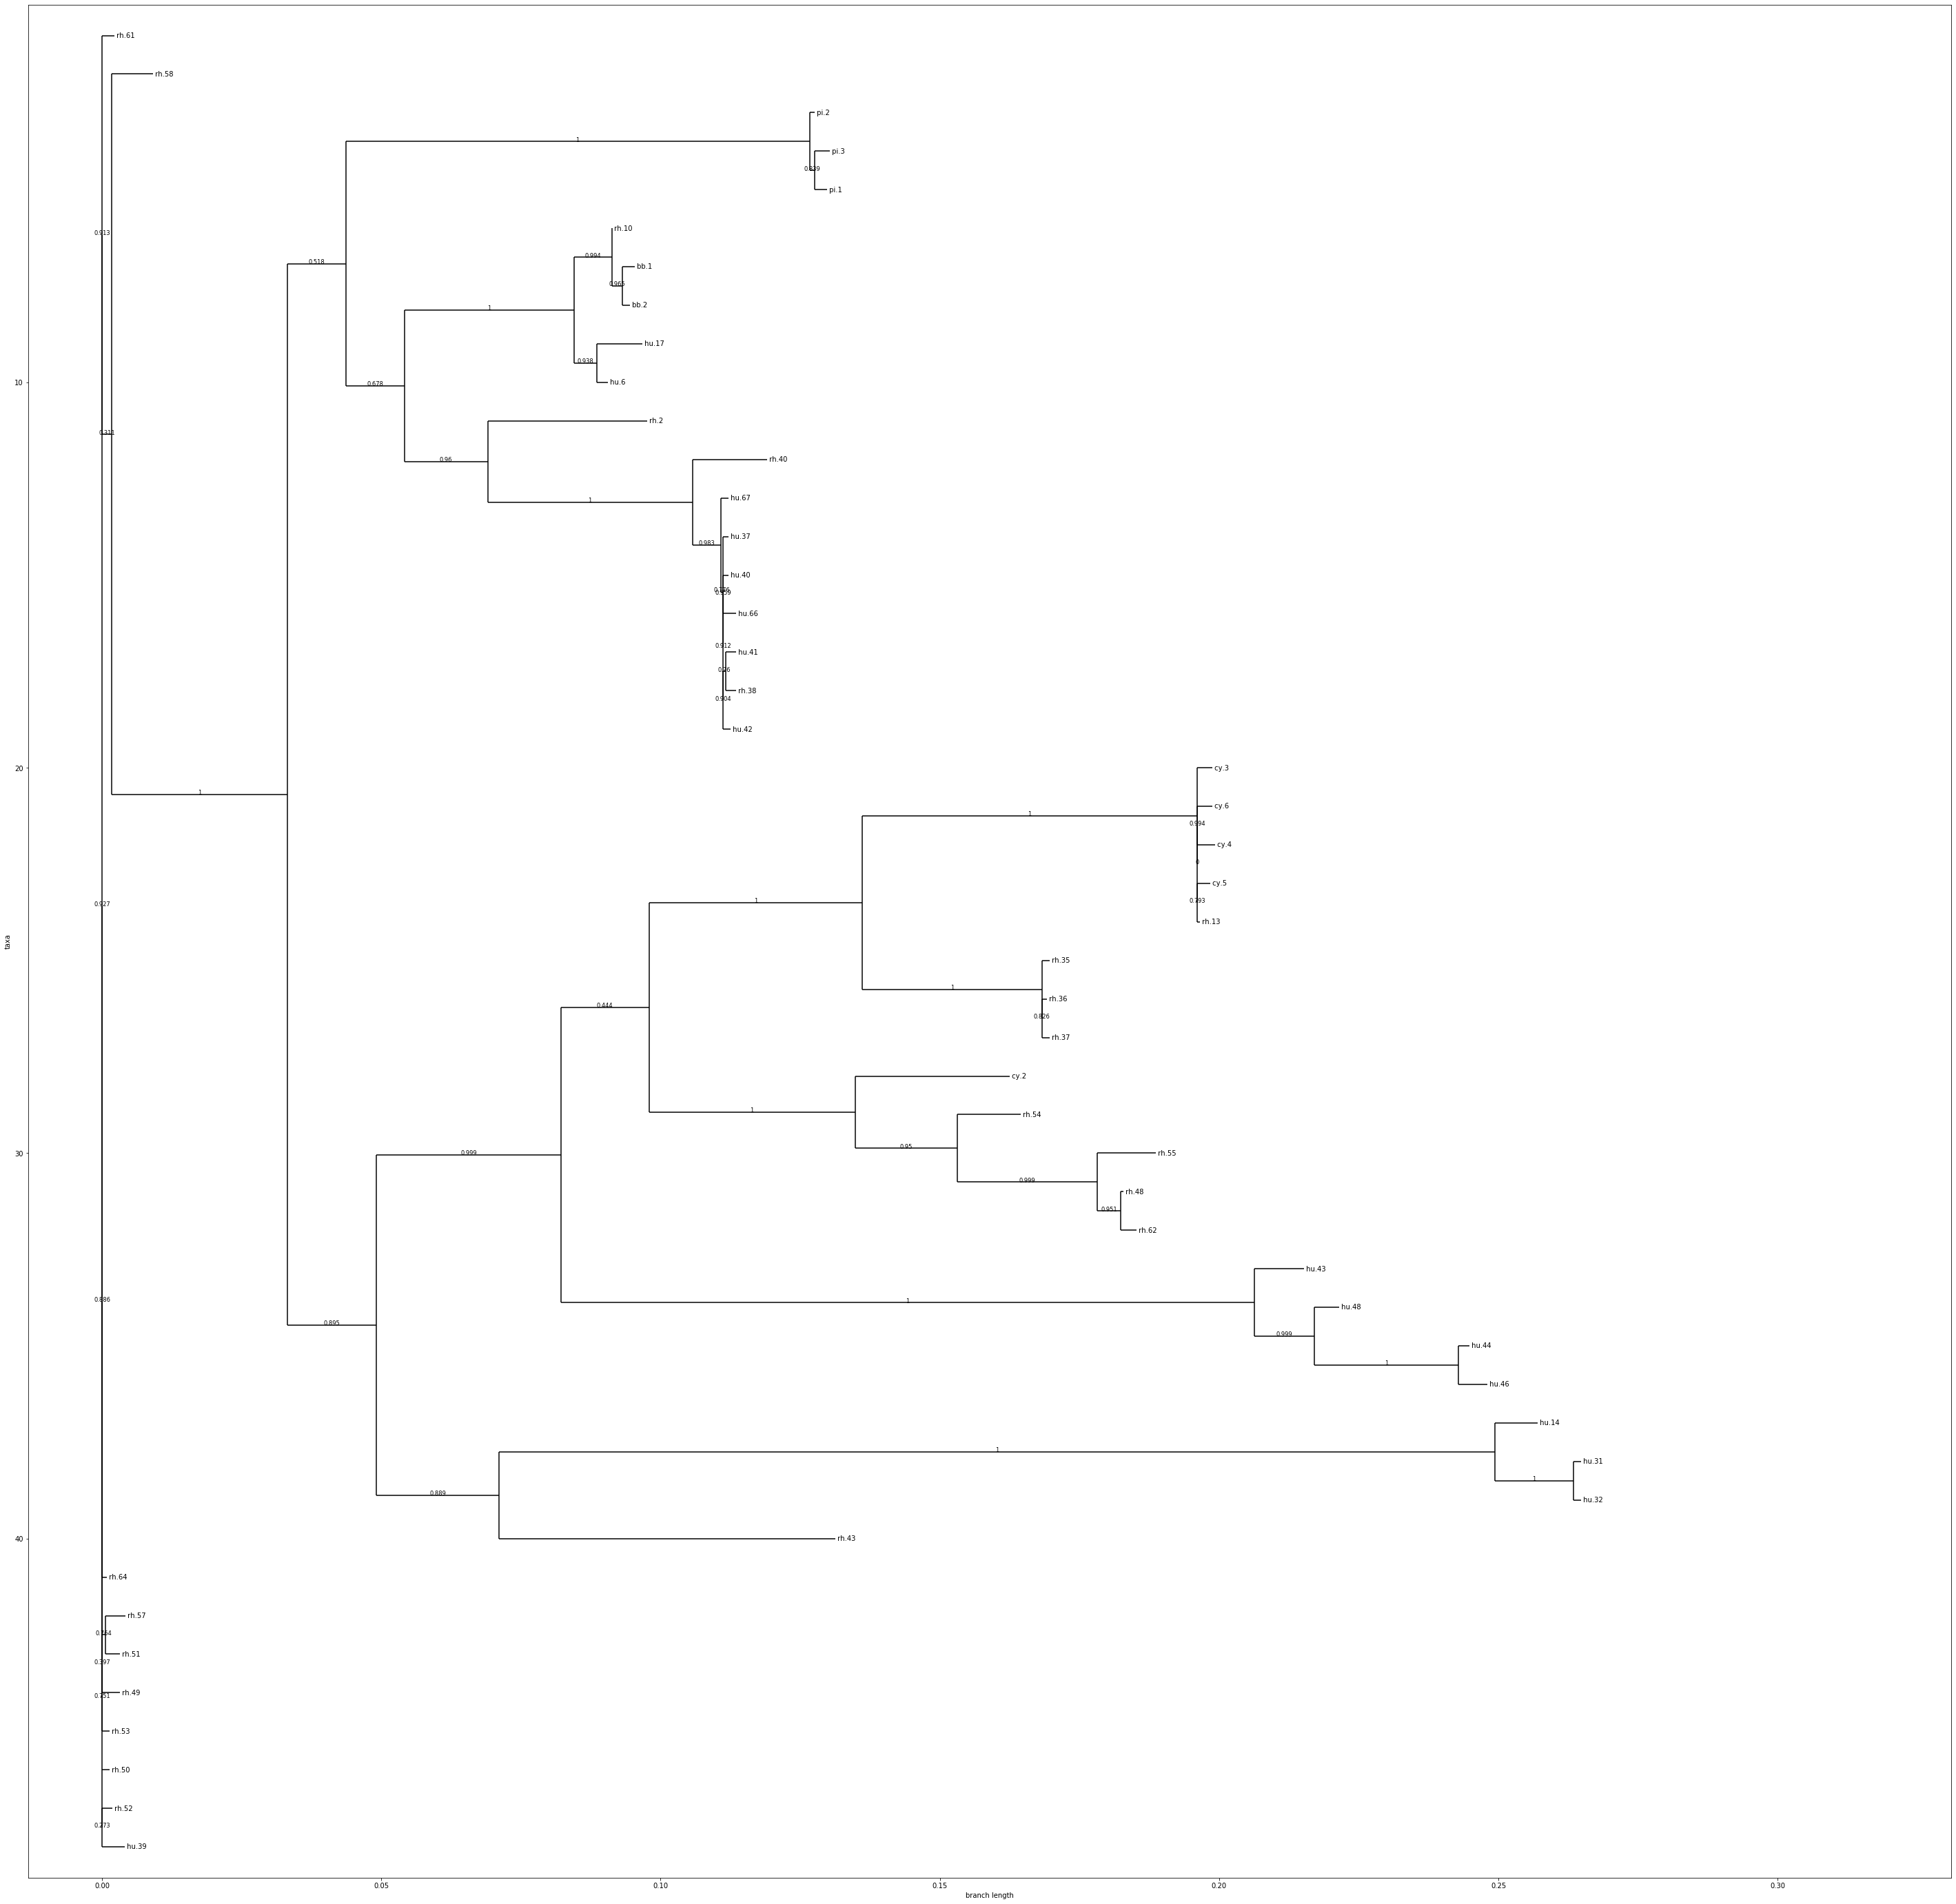

In [1]:
%matplotlib inline
import matplotlib
from Bio import Phylo, SeqIO
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (50,50)
tree = Phylo.read("tree.nwk", "newick")
Phylo.draw(tree)

The tree has some obvious clusters of sequences; for example, `pi.2`, `pi.3`, and `pi.1` seem to be closely related. Additionally, `rh.10`, `bb.1`, `bb.2`, `hu.17`, `hu.6`, `rh.2`, `rh.40`, `hu.67`, `hu.37`, `hu.40`, `hu.66`, `hu.41`, `rh.38`, `hu.42` form a large cluster. Smaller pairs of sequences are also related, such as `hu.44` and `hu.46`, and `hu.31` and `hu.32`. However, there are some sequences that are far more distantly related. `rh.43` and `rh.61` are examples of such sequences.

To identify sequences, we will pick a single specimen from each cluster. I picked `pi.2`, `rh.10`, `cy.3`, `hu.14`, and `rh.61`.

The code below identifies the sequences of the selected specimens and prints them.

In [2]:
specimens = {"pi.2":None, "rh.10":None, "cy.3":None, "hu.14":None, "rh.61":None}
seqs_aligned = SeqIO.parse("seqs.aligned.fa", "fasta")
for record in seqs_aligned:
    if record.id in specimens:
        specimens[record.id] = record
        print(">" + record.id)
        print(record.seq)

>hu.14
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTTAGTGAAGGAATTCGCGAGTGGTGGGCTTTGAAACCTGGAGCCCCTCAACCCAAGGCAAATCAACAACATCAAGACAACGCTCGAGGTCTTGTGCTTCCGGGTTACAAATACCTTGGACCCGGCAACGGACTCGACAAGGGGGAGCCGGTCAACGCAGCAGACGCGGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAGGCCGGAGACAACCCGTACCTCAAGTACAACCACGCCGACGCCGAGTTCCAGGAGCGGCTCAAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGCTTCTTGAACCTCTTGGTCTGGTTGAGGAAGCGGCTAAGACGGCTCCTGGAAAGAAGAGGCCTGTAGAGCAGTCTCCTCAGGA---ACCGGACTCCTCCGCGGGTATTGGCAAATCGGGTGCACAGCCCGCTAAAAAGAGACTCAATTTCGGTCAGACTGGCGACACAGAGTCAGTCCCAGACCCTCAACCAATCGGAGAACCTCCCGCAGCCCCCTCAGGTGTGGGATCTCTTACAATGGCTTCAGGTGGTGGCGCACCAGTGGCAGACAATAACGAAGGTGCCGATGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCCAATGGCTGGGGGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAATCACCTCTACAAGCAAATCTCCAACAGCACATCTGGAGGATCTTCAAATGACAACGCCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCTAAGCGACTCAACTTCAAGCTCTTCAACATTCAGGTCAAAGAGGTTACGGACAACAATGGA

`hu.14` closely matches adeno-associated virus 9 isolate hu.14 capsid protein VP1 (cap) gene, complete cds, cloning vector pAAV9-SBBANN-VBC, complete sequence, synthetic construct clone AAV-PHP.S capsid protein (cap) gene, complete cds. They do not all match the same gene.

`pi.2` closely matches adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds, adeno-associated virus isolate pi.1 capsid protein VP1 (cap) gene, complete cds, adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds. They match the same gene.

`rh.61` closely matches adeno-associated virus isolate rh.61 capsid protein VP1 (cap) gene, complete cds, adeno-associated virus isolate rh.64R1 capsid protein VP1 gene, partial cds, adeno-associated virus isolate rh.46 capsid protein VP1 gene, partial cds. They match the same gene.

`rh.10` closely matches non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds, arthrobacter sp. LS16, complete genome, and non-human primate Adeno-associated virus isolate AAVbb.2 capsid protein (VP1) gene, complete cds. They do not all match the same gene.

`cy.3` closely matches non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds, non-human primate Adeno-associated virus isolate AAVrh.13 capsid protein (VP1) gene, complete cds, and adeno-associated virus isolate cy.5R4 capsid protein VP1 gene, partial cds. They do not all match the same gene.

We might not trust the annotations for sequences that come up in our BLAST since the algorithms used make an estimate of the best local alignment; therefore, it's possible to mis-annotate due to discrepancies.

The code below parses the `seqs.aligned.fa` and then iteratively updates data for the percentage of AT and percentage of CG for each cluster. It then plots this data for each cluster, producing bar plots of percentage of AT or CG versus the position in sequence.

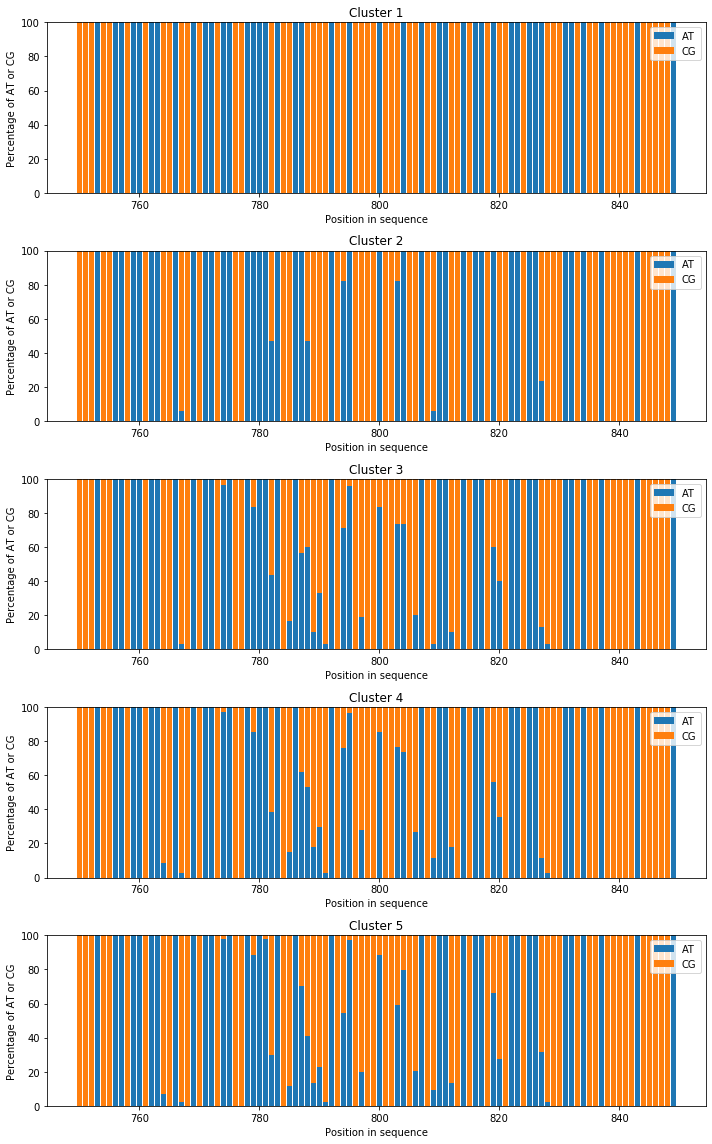

In [3]:
from Bio import AlignIO
align = AlignIO.read("seqs.aligned.fa", "fasta")
clust1 = ["pi.2", "pi.3", "pi.1"]
clust2 = ["rh.10", "bb.1", "bb.2", "hu.17", "hu.6", "rh.2", "rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.41", "rh.38", "hu.42"]
clust3 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13", "rh.35", "rh.36", "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62"]
clust4 = ["hu.14", "hu.31", "hu.32", "rh.43"]
clust5 = ["rh.61", "rh.58", "rh.64", "rh.57", "rh.51", "rh.49", "rh.53", "rh.50", "rh.52", "hu.39"]
clusters = [clust1, clust2, clust3, clust4, clust5]
sequences = []
percentagesAT = []
percentagesCG = []

def isAT(base):
    return base == "A" or base == "T"
def isCG(base):
    return base == "C" or base == "G"

plt.figure(figsize=(10, 16))
index = 1

for cluster in clusters:
    for record in align:
        if record.id in cluster:
            sequences.append(record.seq)
    for i in range(750, 850):
        AT = 0
        CG = 0
        for s in sequences:
            base = s[i]
            if isAT(base):
                AT += 1
            elif isCG(base):
                CG += 1
        percentAT = 100 * AT / (AT + CG)
        percentCG = 100 - percentAT
        percentagesAT.append(percentAT)
        percentagesCG.append(percentCG)
    plt.subplot(5, 1, index)
    AT = plt.bar(height=percentagesAT, x=[750 + i for i in range(len(percentagesAT))])
    CG = plt.bar(height=percentagesCG, x=[750 + i for i in range(len(percentagesCG))], bottom=percentagesAT)
    plt.legend((AT[0], CG[0]), ('AT', 'CG'))
    plt.title("Cluster " + str(index))
    plt.xlabel("Position in sequence")
    plt.ylabel("Percentage of AT or CG")
    plt.tight_layout()
    
    index += 1
    percentagesAT.clear()
    percentagesCG.clear()

The bar plots show that at the beginning and end of the sequence "window" (from indices 750 to 850), the clusters are fairly consistent with eachother, with some small variations in their AT (and consequently but oppositely CG) content. However, in the middle of the sequence window, we notice more variation; this is most obvious in Clusters 3, 4, and 5. This would suggest more (point) mutations, as the sequences within each cluster are different at those indices in terms of the AT and CG content. Notably, Cluster 1 has uniform agreement with its sequences (although this may be attributed to the small cluster size). Finally, Cluster 2 has small variation in the AT and CG content in the middle of the sequence window, but it is not as pronounced as Clusters 3, 4, 5.

The code below finds the sequence lengths for each specimen and makes a list of sequence lengths of each cluster. It then plots the data, producing box plots of sequence length for each cluster.

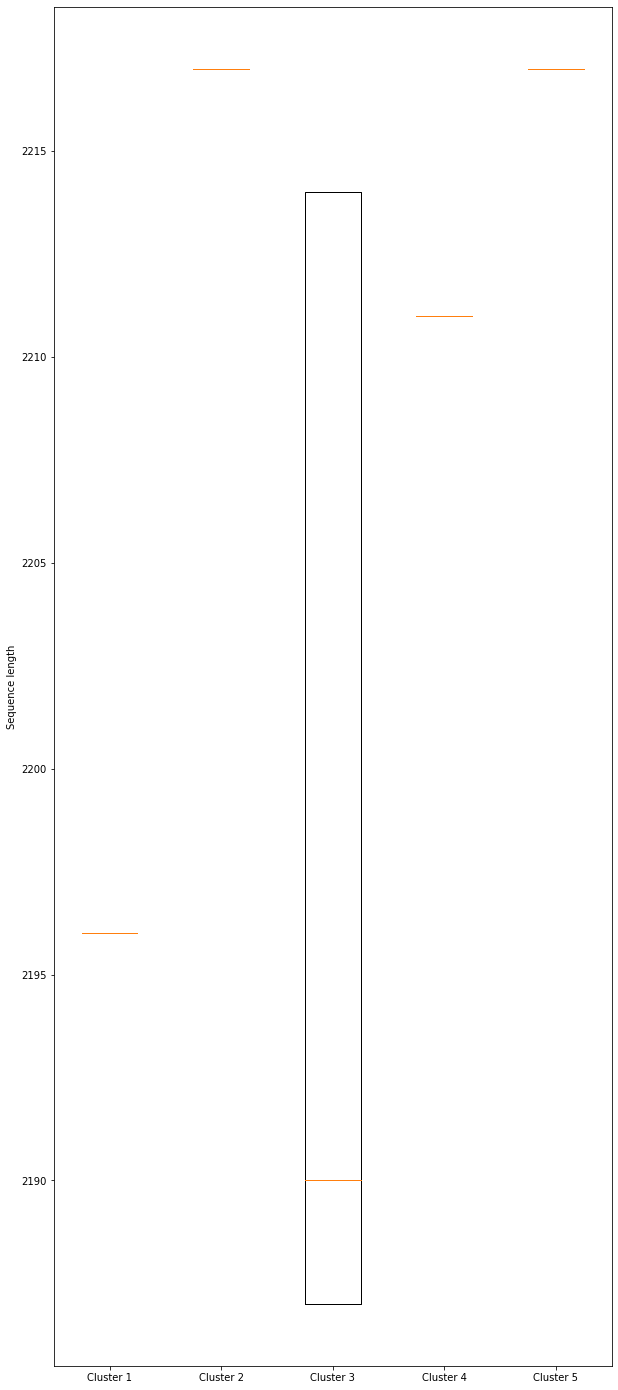

In [4]:
sequenceLengths = [[], [], [], [], []]
seqs = SeqIO.parse("seqs.fa", "fasta")
seqs = [s for s in seqs]

for i in range(len(clusters)):
    for record in seqs:
        if record.id in clusters[i]:
            sequenceLengths[i].append(len(record.seq))
plt.figure(figsize=(10, 25))
plt.ylabel("Sequence length")
sequenceLengthsPlot = plt.boxplot(sequenceLengths, labels=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])

The box plot shows us that there is an extremely narrow distribution of sequence lengths for all clusters except Cluster 3. Cluster 3 has a wide distribution of sequence lengths relative to the other clusters. This suggests that several indel events occured among the sequences captured in Cluster 3 over evolutionary time. It also suggests that differences in the other clusters are liekely smaller: specifically, there may be point mutations.